In [96]:
 data = pd.read_csv('C:/Users/rites/Desktop/PROJECTS_data_analytics/DATA cleaning project python/Diwali Sales Data.csv',encoding = 'unicode_escape')
# print(data.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [98]:
print(data.isnull().sum())

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [103]:
print(data.shape)
data.dropna(inplace = True)

(11251, 13)


In [104]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [113]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
print(data.head())


   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone       Occupation Product_Category  Orders   Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western       Healthcare             Auto       1  23952.0
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern             Govt             Auto       3  23934.0
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central       Automobile             Auto       3  23924.0
3  1001425     Sudevi  P00237842      M      0-17   16               0       Karnataka  Southern     Construction             Auto       2  23912.0
4  1000588       Joni  P00057942      M     26-35   28               1         Gujarat   Western  Food Processing             Auto       2  23877.0


In [115]:
print(data.shape)

(11239, 13)


In [120]:
data['Amount'] = data['Amount'].astype('int')

In [121]:
print(data.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone       Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western       Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern             Govt             Auto       3   23934
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central       Automobile             Auto       3   23924
3  1001425     Sudevi  P00237842      M      0-17   16               0       Karnataka  Southern     Construction             Auto       2   23912
4  1000588       Joni  P00057942      M     26-35   28               1         Gujarat   Western  Food Processing             Auto       2   23877


In [123]:
#use of describe function on specific column
data['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# WORK ON GENDERS [EDA]

In [172]:
c=data[data['Gender']=='M'].shape[0]
print(c)

3407


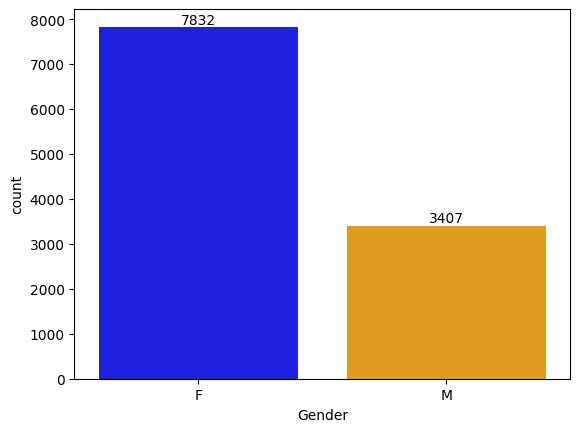

In [183]:
gender_count = sns.countplot(x='Gender',hue = 'Gender', data=data, palette=['blue','orange'])

# Adding labels to bars
for bars in gender_count.containers:
    gender_count.bar_label(bars)

plt.show()


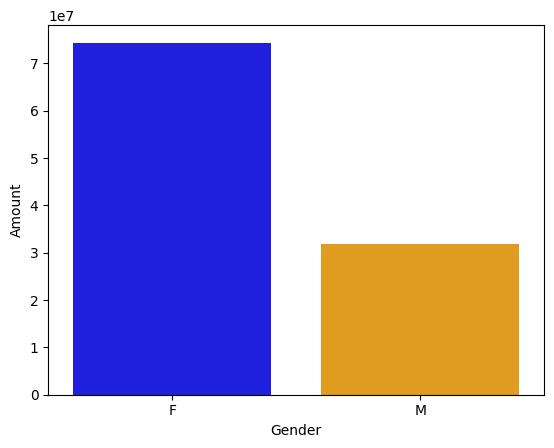

In [197]:
sales_gender = data.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
# sns.barplot(x='Gender',y='Amount',data = sales_gender,palette=['blue','orange'])
sns.barplot(x='Gender', y='Amount', hue='Gender', data=sales_gender, palette=['blue', 'orange'])
plt.show()


## Till now, from analysis of this data, we can see the most of the buyers are FEMALE and purchasing power of female is more than male).

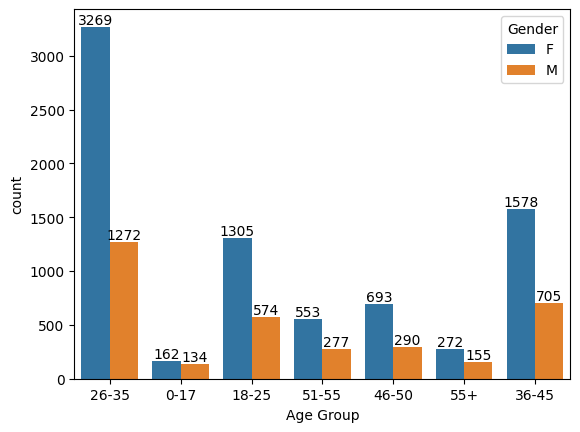

In [192]:
age_grp = sns.countplot(data = data,x='Age Group',hue ='Gender')
for bars in age_grp.containers:
    age_grp.bar_label(bars)

In [196]:
print(data.head(3))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone  Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western  Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern        Govt             Auto       3   23934
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central  Automobile             Auto       3   23924


<Axes: xlabel='Age Group', ylabel='Amount'>

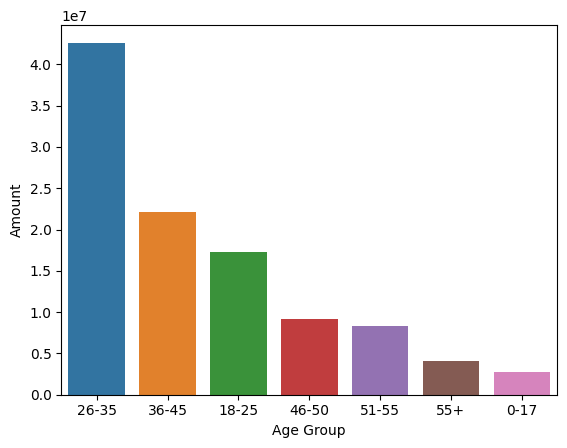

In [200]:
#Total Amount vs Age group
sales_age = data.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Age Group',y='Amount',data = sales_age,hue = 'Age Group')

## we can see from above graph that the maximum number of buyers are in age group of 26-35 and that too FEMALES are more in number  

## work on state column

In [201]:
print(data.head(3))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone  Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western  Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern        Govt             Auto       3   23934
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central  Automobile             Auto       3   23924


<Axes: xlabel='State', ylabel='Orders'>

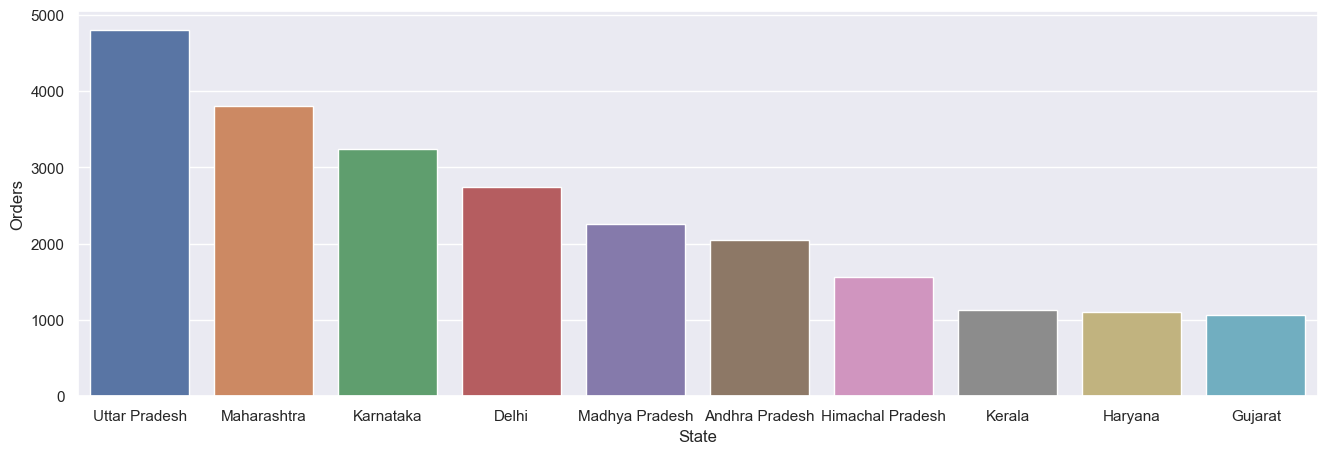

In [220]:
sales_state = data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize' : (16,5)})
sns.barplot(data = sales_state,x = 'State' , y = 'Orders',hue = 'State')

In [221]:
print(data.head(3))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone  Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western  Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern        Govt             Auto       3   23934
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central  Automobile             Auto       3   23924


<Axes: xlabel='State', ylabel='Amount'>

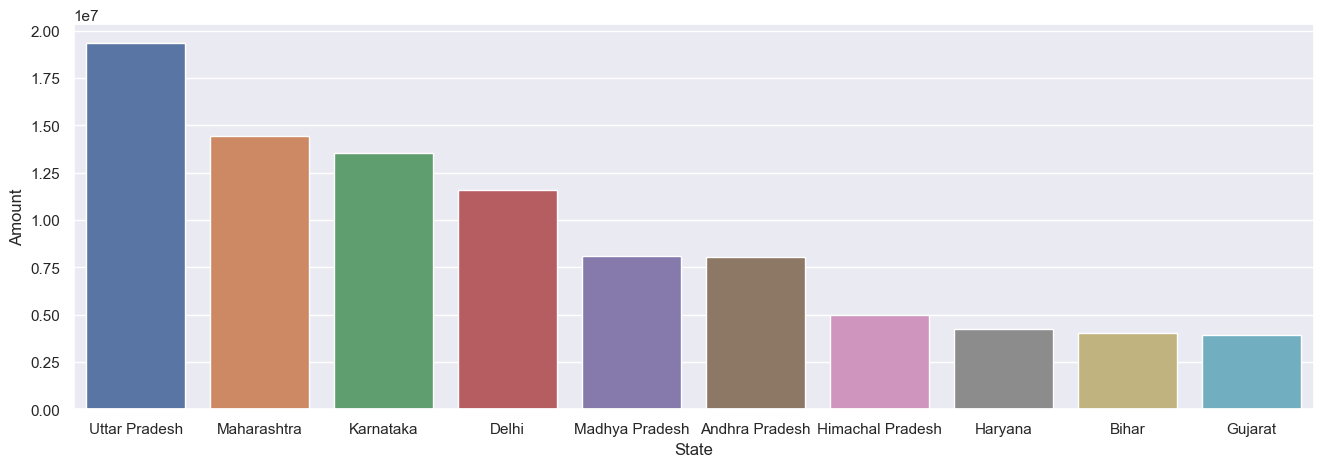

In [223]:
sales_sm = data.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by ='Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize' : (16,5)})
sns.barplot(data = sales_sm,x='State',y='Amount',hue = 'State')

# work on marital_status column

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone  Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western  Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern        Govt             Auto       3   23934


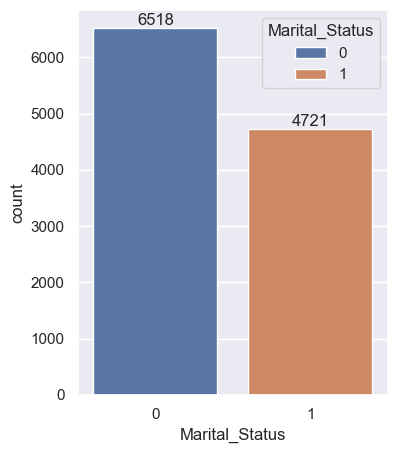

In [245]:
print(data.head(2))
ax = sns.countplot(data = data,x = 'Marital_Status', hue = 'Marital_Status')
sns.set(rc={'figure.figsize' : (4,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

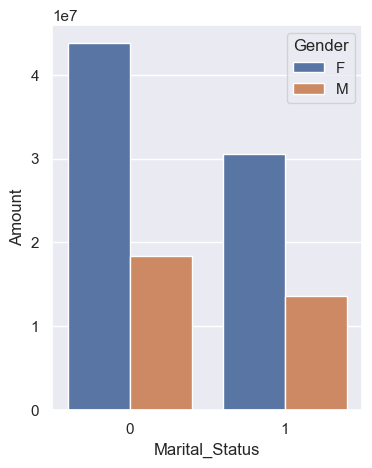

In [244]:
mstatus_amount = data.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by= 'Amount',ascending = False)
sns.set(rc={'figure.figsize' : (4,5)})
sns.barplot(data = mstatus_amount,x='Marital_Status',y='Amount',hue = 'Gender')

# WORK ON OCCUPATION COLUMN

In [246]:
print(data.head(3))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone  Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western  Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern        Govt             Auto       3   23934
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central  Automobile             Auto       3   23924


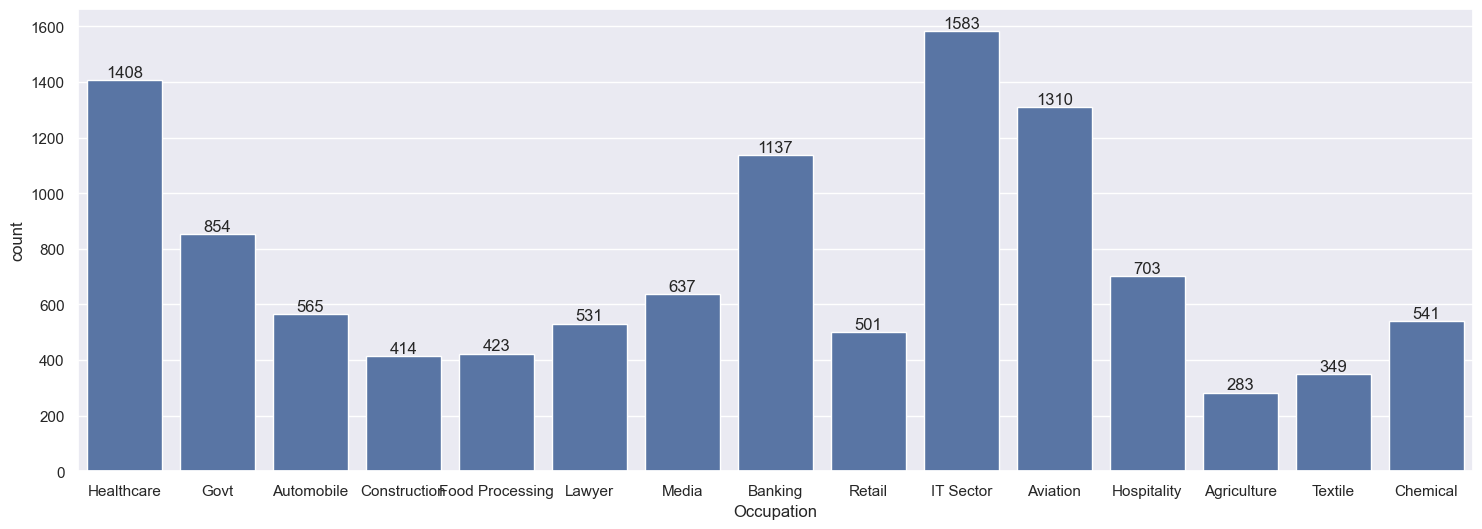

In [269]:
count_occup = sns.countplot(data = data , x='Occupation')
sns.set(rc={'figure.figsize' : (15,6)})
for bars in count_occup.containers:
    count_occup.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

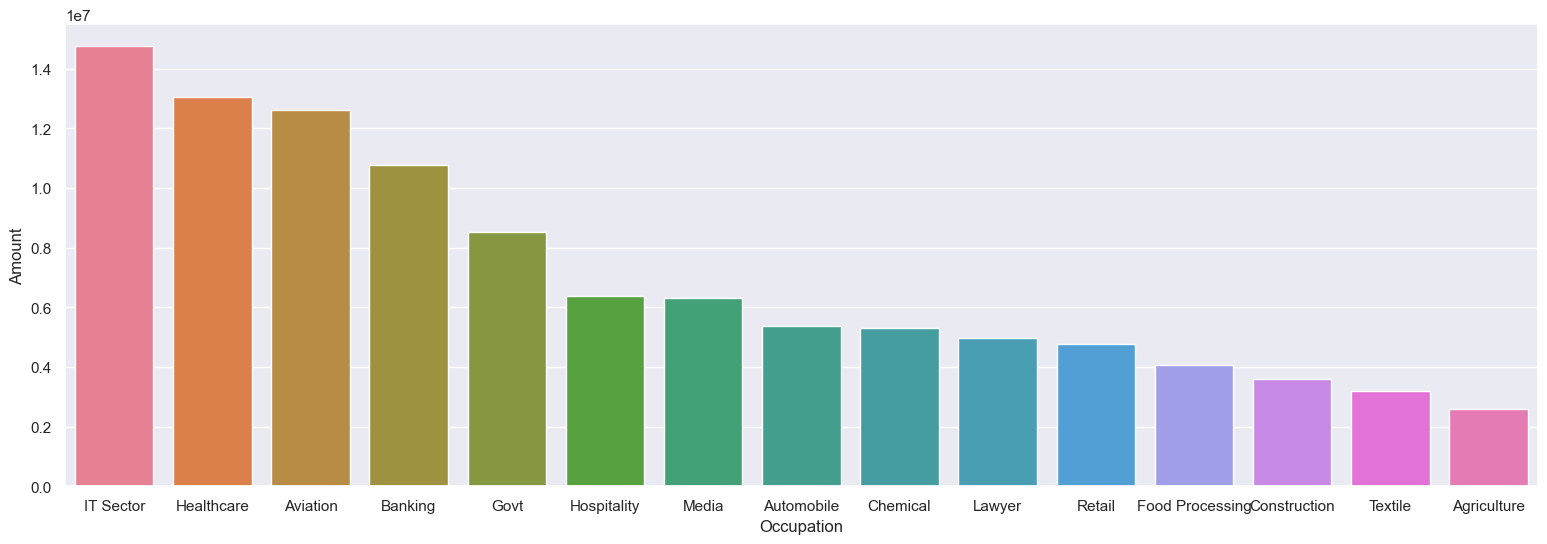

In [275]:
occup_amount = data.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc={'figure.figsize' : (19,6)})
sns.barplot(data = occup_amount,x= 'Occupation',y='Amount',hue= 'Occupation')

In [276]:
print(data.head(3))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone  Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western  Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern        Govt             Auto       3   23934
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central  Automobile             Auto       3   23924


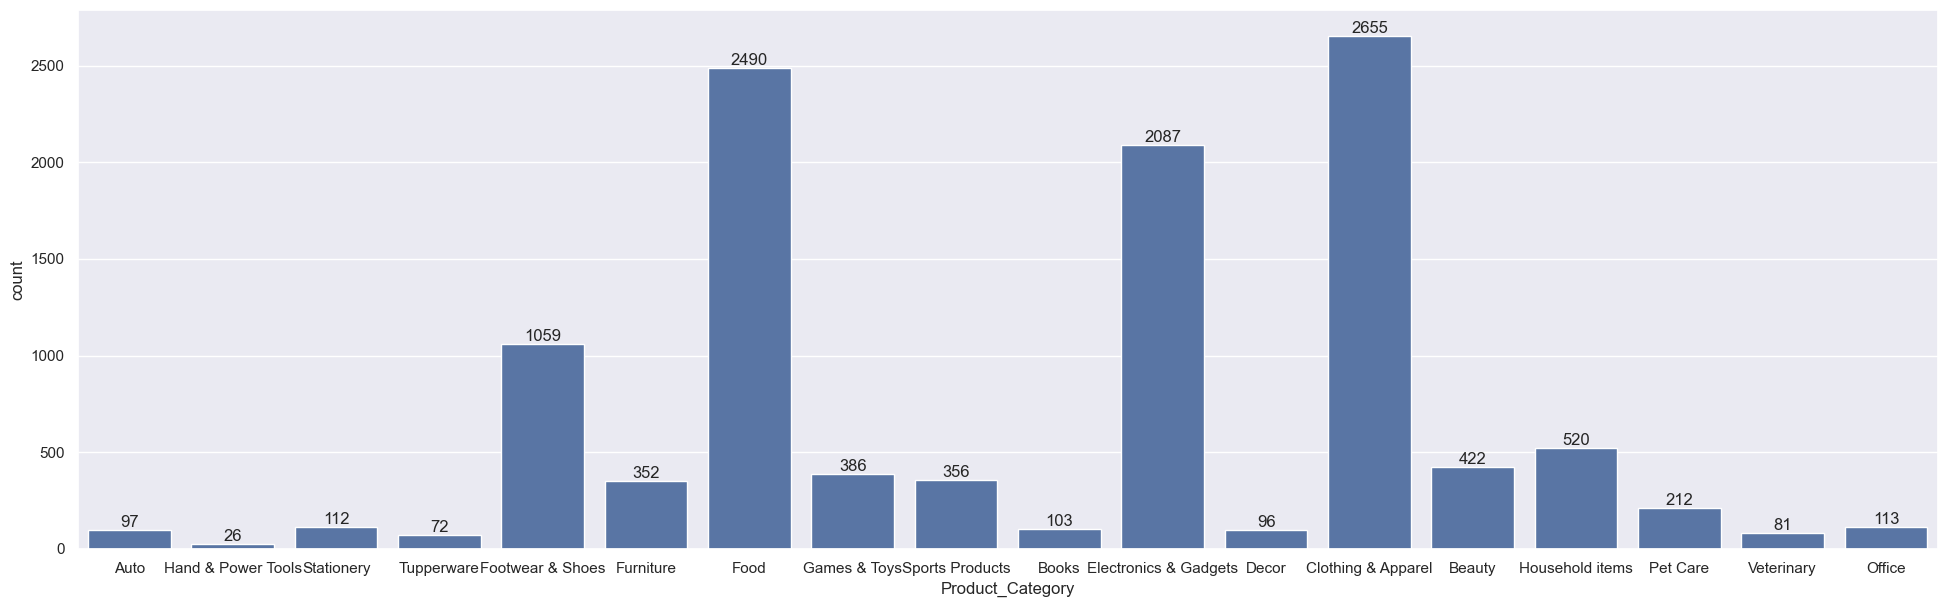

In [318]:
ax = sns.countplot(data = data , x = 'Product_Category')
sns.set(rc={'figure.figsize': (24,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

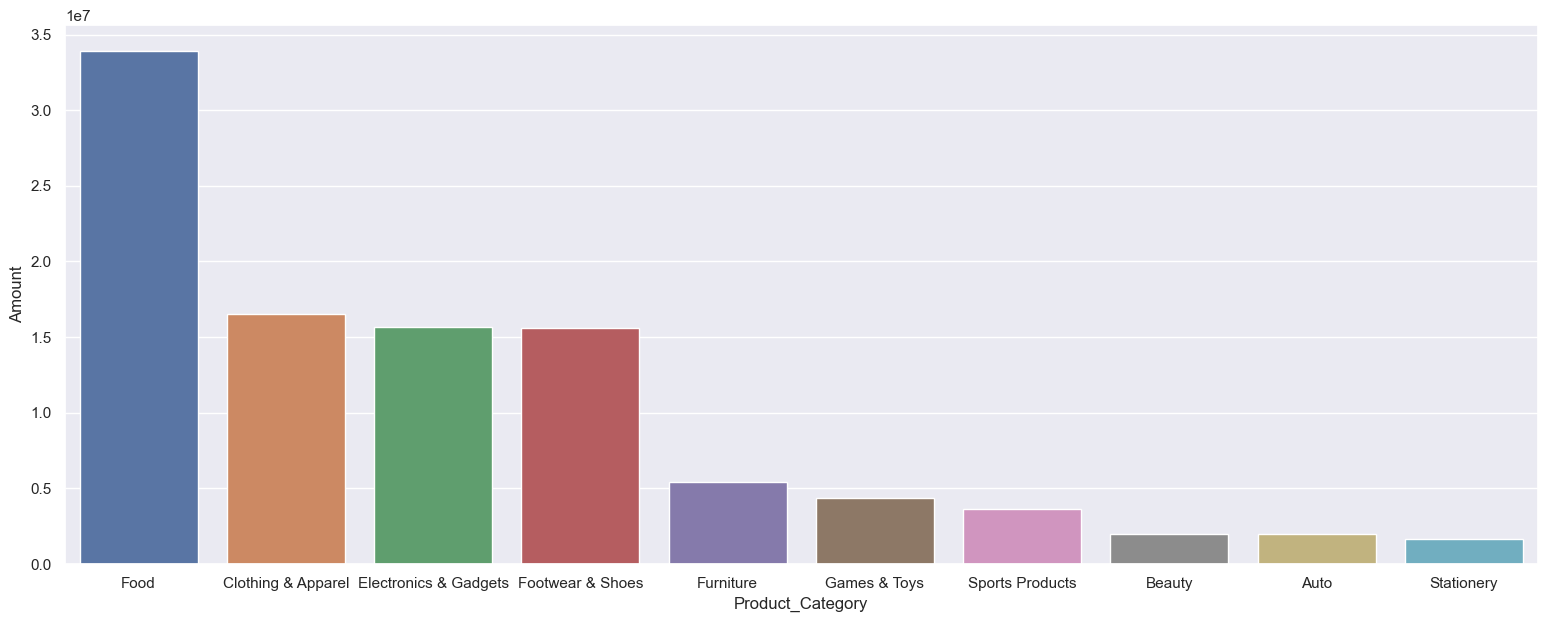

In [326]:
product_sales = data.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize': (19,7)})
sns.barplot(data = product_sales, x= 'Product_Category',y = 'Amount',hue = 'Product_Category')

In [ ]:
#we cam see most of the sold product is food then clothing & apprarel then electronics & gadget etc...

In [334]:
print(data.head(3))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status           State      Zone  Occupation Product_Category  Orders  Amount
0  1002903  Sanskriti  P00125942      F     26-35   28               0     Maharashtra   Western  Healthcare             Auto       1   23952
1  1000732     Kartik  P00110942      F     26-35   35               1  Andhra Pradesh  Southern        Govt             Auto       3   23934
2  1001990      Bindu  P00118542      F     26-35   35               1   Uttar Pradesh   Central  Automobile             Auto       3   23924


<Axes: xlabel='Product_ID', ylabel='Orders'>

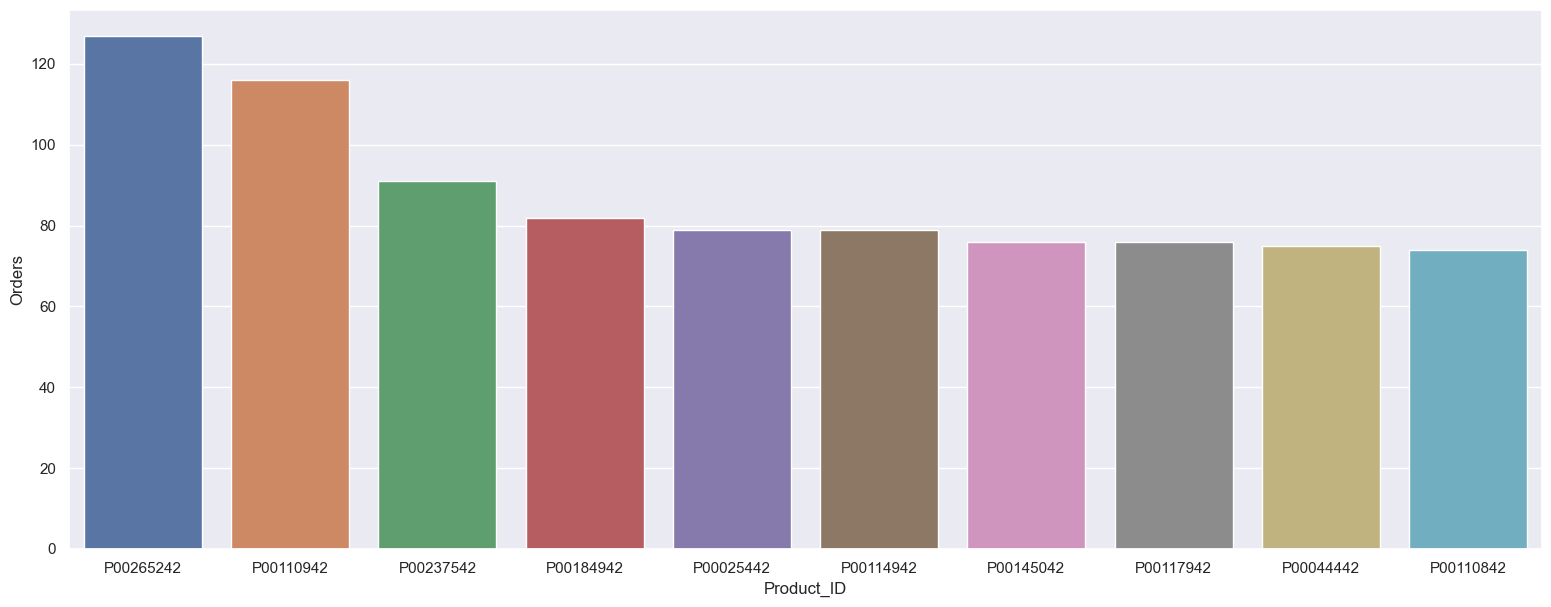

In [333]:
#product_id vs  orders
pro_order = data.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data = pro_order , x='Product_ID',y='Orders',hue ='Product_ID')

# CONCLUSION FROM THIS ANALYSIS:

## This analysis reveals a strong buying trend among married women (26-35) from UP, Maharastra, Karnataka especially in IT, Healthcare and Aviation sectors, favouring food, Clothing and Electronics